In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('Auto_Insurance_Fraud_Claims_File01.csv')
df.shape

(40000, 53)

In [3]:
print(df.columns.tolist())

['Claim_ID', 'Bind_Date1', 'Customer_Life_Value1', 'Age_Insured', 'Policy_Num', 'Policy_State', 'Policy_Start_Date', 'Policy_Expiry_Date', 'Policy_BI', 'Policy_Ded', 'Policy_Premium', 'Umbrella_Limit', 'Insured_Zip', 'Gender', 'Education', 'Occupation', 'Hobbies', 'Insured_Relationship', 'Capital_Gains', 'Capital_Loss', 'Garage_Location', 'Accident_Date', 'Accident_Type', 'Collision_Type', 'Accident_Severity', 'authorities_contacted', 'Acccident_State', 'Acccident_City', 'Accident_Location', 'Accident_Hour', 'Num_of_Vehicles_Involved', 'Property_Damage', 'Bodily_Injuries', 'Witnesses', 'Police_Report', 'DL_Expiry_Date', 'Claims_Date', 'Auto_Make', 'Auto_Model', 'Auto_Year', 'Vehicle_Color', 'Vehicle_Cost', 'Annual_Mileage', 'DiffIN_Mileage', 'Low_Mileage_Discount', 'Fraud_Ind', 'Commute_Discount', 'Total_Claim', 'Injury_Claim', 'Property_Claim', 'Vehicle_Claim', 'Vehicle_Registration', 'Check_Point']


In [4]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [5]:
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

In [6]:

imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

In [7]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [8]:
X = df.drop("Fraud_Ind", axis=1)
y = df["Fraud_Ind"]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

In [11]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Predict for a new input sample
# Replace with real input values in correct order
sample_input = [X.iloc[0].values]  # example: use first row for test
predicted_label = model.predict(sample_input)
print("Predicted Fraud (1=True, 0=False):", predicted_label[0])

Accuracy: 1.0
Confusion Matrix:
 [[15016     0]
 [    0  4984]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15016
           1       1.00      1.00      1.00      4984

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Predicted Fraud (1=True, 0=False): 0


In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Logistic Regression:\n", classification_report(y_test, y_pred))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88     15016
           1       0.66      0.44      0.53      4984

    accuracy                           0.81     20000
   macro avg       0.75      0.68      0.70     20000
weighted avg       0.79      0.81      0.79     20000



In [14]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Decision Tree:\n", classification_report(y_test, y_pred))


Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15016
           1       1.00      1.00      1.00      4984

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [15]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("KNN:\n", classification_report(y_test, y_pred))


KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15016
           1       1.00      0.99      0.99      4984

    accuracy                           1.00     20000
   macro avg       1.00      0.99      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [16]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("XGBoost:\n", classification_report(y_test, y_pred))


c:\Users\soubh\Desktop\spam_detect\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:01:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15016
           1       1.00      1.00      1.00      4984

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [17]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Gradient Boosting:\n", classification_report(y_test, y_pred))


Gradient Boosting:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     15016
           1       0.92      0.90      0.91      4984

    accuracy                           0.95     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.95      0.95      0.95     20000



In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

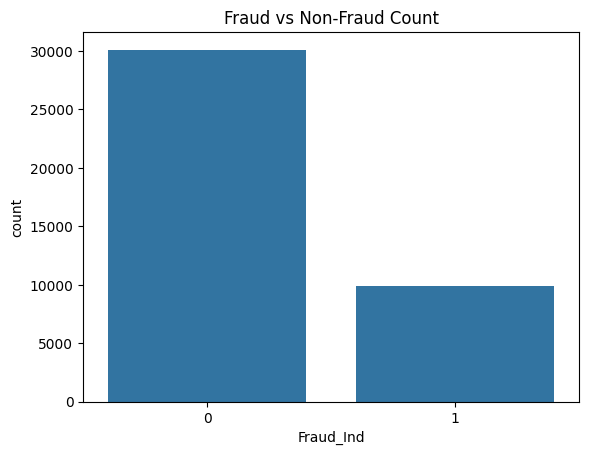

In [19]:
sns.countplot(x='Fraud_Ind', data=df)
plt.title("Fraud vs Non-Fraud Count")
plt.show()


In [21]:
def pie_chart_by_column(df, column, target='Fraud_Ind'):
    values = df.groupby(column)[target].value_counts().unstack().fillna(0)
    for val in values.index:
        labels = ['Not Fraud', 'Fraud']
        sizes = values.loc[val].values
        colors = ['skyblue', 'salmon']
        explode = (0, 0.1)

        plt.figure(figsize=(5, 5))
        plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=140, colors=colors)
        plt.title(f"{column}: {val}")
        plt.axis('equal')
        plt.show()


In [23]:
import pandas as pd

# Load dataset
df = pd.read_csv('Auto_Insurance_Fraud_Claims_File01.csv')  # Replace with your filename

# Dictionary to hold column: [unique values]
unique_dict = {}

for col in df.columns:
    unique_values = df[col].dropna().unique().tolist()
    unique_dict[col] = unique_values

# Create a new DataFrame where each row is a column name followed by its unique values
max_len = max(len(v) for v in unique_dict.values())
final_data = []

for key, values in unique_dict.items():
    row = [key] + values + [""] * (max_len - len(values))  # pad empty strings for alignment
    final_data.append(row)

# Convert to DataFrame and save to CSV

output_df = pd.DataFrame(final_data)
output_df.to_csv("column_unique_values.csv", index=False, header=False)

print("✅ 'column_unique_values.csv' created successfully.")


✅ 'column_unique_values.csv' created successfully.


C:\Users\soubh\AppData\Local\Temp\ipykernel_9980\148123434.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[:15], y=importances.index[:15], palette='viridis')


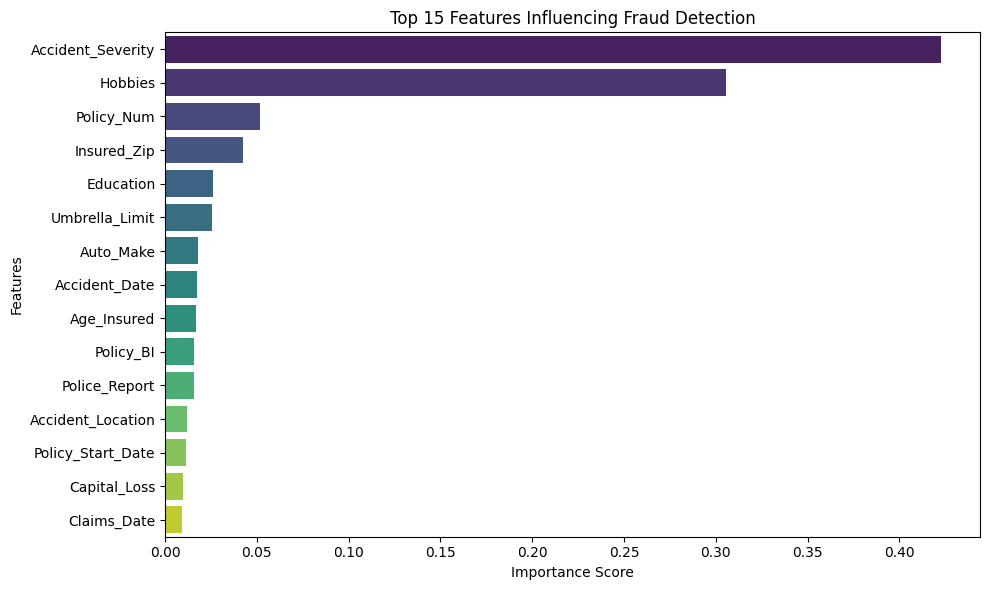

              precision    recall  f1-score   support

     Genuine       0.94      0.95      0.94      9028
       Fraud       0.84      0.80      0.82      2972

    accuracy                           0.91     12000
   macro avg       0.89      0.88      0.88     12000
weighted avg       0.91      0.91      0.91     12000


✅ Saved filtered dataset as 'Top_15_Features_Fraud_Claims.csv'


In [24]:
df.columns = df.columns.str.strip()

# Remove rows where 'Fraud_Ind' is missing or not in ['Y', 'N']
df = df[df['Fraud_Ind'].isin(['Y', 'N'])]

# Separate features and label
X = df.drop(columns=['Fraud_Ind'])
y = df['Fraud_Ind'].map({'Y': 1, 'N': 0})  # 1 = Fraud, 0 = Genuine

# Encode categorical features
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].fillna('Missing')
    X[col] = le.fit_transform(X[col])

# Fill missing numerical values with median
for col in X.select_dtypes(include='number').columns:
    X[col] = X[col].fillna(X[col].median())

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:15], y=importances.index[:15], palette='viridis')
plt.title('Top 15 Features Influencing Fraud Detection')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Print classification performance
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Genuine", "Fraud"]))

# Save new DataFrame with top 15 features + label
top_features = importances[:15].index.tolist()
final_df = df[top_features + ['Fraud_Ind']]
final_df.to_csv("important.csv", index=False)
print("\n✅ Saved filtered dataset as 'Top_15_Features_Fraud_Claims.csv'")